# Library

In [1]:
# Common Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy import stats

# Library for panels
from linearmodels import PooledOLS,RandomEffects,PanelOLS
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kstest

# Dataset

In [2]:
data = pd.read_csv('D:\Semester 6\Data Panel\Tugas Akhir\data preprocessed.csv')

In [3]:
data.head()

,temp_max,temp_min,app_temp_max,app_temp_min,srs,rain_sum,snowfall_sum,ws_10m_max,wg_10m_max,wd_10m_dom,et0,elevation,city,daylight_dur,time
0,21.1,16.5,24.5,18.3,5.15,22.0,0.0,3.6,15.1,25.0,1.12,1391,b,718.0,2018-01-01
1,22.2,16.1,25.0,17.7,11.23,15.7,0.0,3.1,19.8,166.0,2.14,1391,b,719.0,2018-01-02
2,22.0,16.0,25.2,17.7,5.14,21.2,0.0,4.3,30.6,203.0,1.10,1391,b,718.0,2018-01-03
3,21.8,15.6,25.2,17.0,6.80,9.1,0.0,4.4,24.1,331.0,1.38,1391,b,719.0,2018-01-04
4,23.3,16.4,25.7,17.9,18.50,0.7,0.0,6.0,29.2,232.0,3.46,1391,b,719.0,2018-01-05


In [4]:
data['time'] =  pd.to_datetime(data['time'], format='%Y-%M-%d')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13090 entries, 0 to 13089
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   temp_max      13090 non-null  float64       
 1   temp_min      13090 non-null  float64       
 2   app_temp_max  13090 non-null  float64       
 3   app_temp_min  13090 non-null  float64       
 4   srs           13090 non-null  float64       
 5   rain_sum      13090 non-null  float64       
 6   snowfall_sum  13090 non-null  float64       
 7   ws_10m_max    13090 non-null  float64       
 8   wg_10m_max    13090 non-null  float64       
 9   wd_10m_dom    13090 non-null  float64       
 10  et0           13090 non-null  float64       
 11  elevation     13090 non-null  int64         
 12  city          13090 non-null  object        
 13  daylight_dur  13090 non-null  float64       
 14  time          13090 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), i

In [6]:
time = data.time
city = data.city
data = data.set_index(['city',"time"])

In [7]:
data['time'] = pd.Categorical(time)
data['city'] = pd.Categorical(city)

In [8]:
data.head()

temp_max  temp_min  app_temp_max  app_temp_min  \
city time                                                                  
b    2018-01-01 00:01:00      21.1      16.5          24.5          18.3   
     2018-01-02 00:01:00      22.2      16.1          25.0          17.7   
     2018-01-03 00:01:00      22.0      16.0          25.2          17.7   
     2018-01-04 00:01:00      21.8      15.6          25.2          17.0   
     2018-01-05 00:01:00      23.3      16.4          25.7          17.9   

                            srs  rain_sum  snowfall_sum  ws_10m_max  \
city time                                                             
b    2018-01-01 00:01:00   5.15      22.0           0.0         3.6   
     2018-01-02 00:01:00  11.23      15.7           0.0         3.1   
     2018-01-03 00:01:00   5.14      21.2           0.0         4.3   
     2018-01-04 00:01:00   6.80       9.1           0.0         4.4   
     2018-01-05 00:01:00  18.50       0.7           0.0         6.0   

                          wg_10m_max  wd_10m_dom   et0  elevation  \
city time                                                           
b    2018-01-01 00:01:00        15.1        25.0  1.12       1391   
     2018-01-02 00:01:00        19.8       166.0  2.14       1391   
     2018-01-03 00:01:00        30.6       203.0  1.10       1391   
     2018-01-04 00:01:00        24.1       331.0  1.38       1391   
     2018-01-05 00:01:00        29.2       232.0  3.46       1391   

                          daylight_dur                time city  
city time                                                        
b    2018-01-01 00:01:00         718.0 2018-01-01 00:01:00    b  
     2018-01-02 00:01:00         719.0 2018-01-02 00:01:00    b  
     2018-01-03 00:01:00         718.0 2018-01-03 00:01:00    b  
     2018-01-04 00:01:00         719.0 2018-01-04 00:01:00    b  
     2018-01-05 00:01:00         719.0 2018-01-05 00:01:00    b

# Make Pooled OLS

In [9]:
exog_var = ['temp_max', 'temp_min', 'app_temp_max', 'app_temp_min', 'srs', 'snowfall_sum', 'ws_10m_max', 'wg_10m_max', 'wd_10m_dom',
       'et0', 'daylight_dur']

In [10]:
exog = sm.tools.tools.add_constant(data[exog_var])
endog = data['rain_sum']
mod = PooledOLS(endog, exog,check_rank=False)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

In [11]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:               rain_sum   R-squared:                        0.4194
Estimator:                  PooledOLS   R-squared (Between):              0.8040
No. Observations:               13090   R-squared (Within):               0.2517
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.4194
Time:                        21:36:07   Log-likelihood                -4.438e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      858.97
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,13078)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):          2.122e+13
                            

## Diagnostic Test Pooled Regression

In [12]:
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

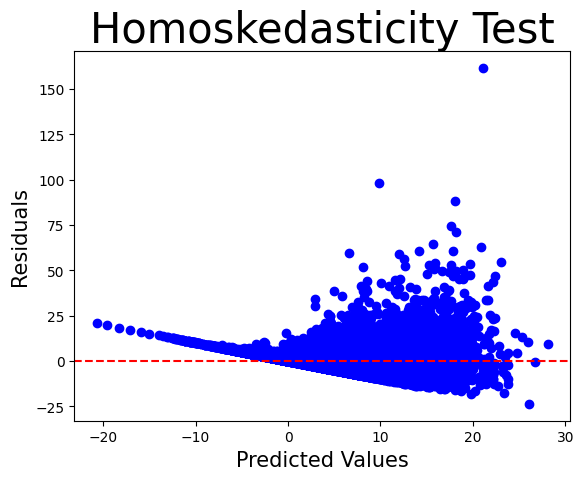

In [13]:
# 3A. Homoskedasticity
# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 30)
plt.show()

In [14]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['time'], axis = 1).fillna(0)
white_test_results = het_white(pooled_OLS_dataset["residual"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 961.4405121924408, 'LM p-val': 8.03158931037742e-153, 'F-Stat': 13.395734298325456, 'F p-val': 1.204191682746879e-159}


In [15]:
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset["residual"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 352.1762708377748, 'LM p-val': 8.394606935703957e-69, 'F-Stat': 32.871044450309086, 'F p-val': 8.835505336103005e-70}


In [16]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset["residual"]) 
print(durbin_watson_test_results)

1.2873128491447876


# Fixed Effect

In [17]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.2941
Estimator:                   PanelOLS   R-squared (Between):              0.0498
No. Observations:               13090   R-squared (Within):               0.2941
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.2199
Time:                        21:36:08   Log-likelihood                -4.328e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      495.11
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,13069)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             495.11
                            

In [18]:
model_fe2 = PanelOLS(endog, exog,time_effects=True) 
fe_res2 = model_fe2.fit()
print(fe_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.4217
Estimator:                   PanelOLS   R-squared (Between):              0.8153
No. Observations:               13090   R-squared (Within):               0.2412
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.4156
Time:                        21:36:08   Log-likelihood                 -4.35e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      780.33
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,11770)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             780.33
                            

In [19]:
model_fe3 = PanelOLS(endog, exog,time_effects=True, entity_effects=True) 
fe_res3 = model_fe3.fit()
print(fe_res3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.2670
Estimator:                   PanelOLS   R-squared (Between):             -0.0299
No. Observations:               13090   R-squared (Within):               0.2891
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.1922
Time:                        21:36:09   Log-likelihood                -4.227e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      389.42
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,11761)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             389.42
                            

# Random Effect

In [20]:
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:               rain_sum   R-squared:                        0.4194
Estimator:              RandomEffects   R-squared (Between):              0.8040
No. Observations:               13090   R-squared (Within):               0.2517
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.4194
Time:                        21:36:09   Log-likelihood                -4.438e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      858.97
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,13078)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             858.97
                            

# Hausman Test

In [21]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b-B).T, la.inv(v_b-v_B).dot(b-B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [22]:
hausman_results = hausman(fe_res,re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-Value:'+ str(hausman_results[2]))

chi-Squared: -2083.1349321308594
degrees of freedom:12
p-Value:1.0


In [23]:
hausman_results = hausman(fe_res2,re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-Value:'+ str(hausman_results[2]))

chi-Squared: 620.5700492116978
degrees of freedom:12
p-Value:4.2813526120837493e-125


In [24]:
hausman_results = hausman(fe_res3,re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-Value:'+ str(hausman_results[2]))

chi-Squared: 5249.375192342311
degrees of freedom:12
p-Value:0.0


# Breusch-Pagan Test for Fixed Effect Model

## fe_res (entity effect)

In [25]:
# Store values for checking homoskedasticity graphically
fittedvals_fixed1 = fe_res.predict().fitted_values
residuals_fixed1 = fe_res.resids
fixed_Panels_dataset = pd.concat([data, residuals_fixed1], axis=1)
fixed_Panels_dataset = fixed_Panels_dataset.drop(['time'], axis = 1).fillna(0)
# Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fixed_Panels_dataset["residual"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 303.17986485979134, 'LM p-val': 1.8727810832820335e-58, 'F-Stat': 28.18943988441756, 'F p-val': 3.6132686829074252e-59}


## fe_res2 (time effect)

In [26]:
# Store values for checking homoskedasticity graphically
fittedvals_fixed2 = fe_res2.predict().fitted_values
residuals_fixed2 = fe_res2.resids
fixed_Panels_dataset2 = pd.concat([data, residuals_fixed2], axis=1)
fixed_Panels_dataset2 = fixed_Panels_dataset2.drop(['time'], axis = 1).fillna(0)
# Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fixed_Panels_dataset2["residual"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 363.4549480137365, 'LM p-val': 3.4365664871647287e-71, 'F-Stat': 33.95382565058224, 'F p-val': 3.1033816167935745e-72}


## fe_res3 (entity & time effect)

In [27]:
# Store values for checking homoskedasticity graphically
fittedvals_fixed3 = fe_res3.predict().fitted_values
residuals_fixed3 = fe_res3.resids
fixed_Panels_dataset3 = pd.concat([data, residuals_fixed3], axis=1)
fixed_Panels_dataset3 = fixed_Panels_dataset3.drop(['time'], axis = 1).fillna(0)
# Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fixed_Panels_dataset3["residual"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 296.3492581968745, 'LM p-val': 5.146384219260821e-57, 'F-Stat': 27.539623698119854, 'F p-val': 1.0722272655855795e-57}


# Wald Test

## Model 1

In [28]:
exog_var1 = ['temp_max', 'temp_min', 'app_temp_max', 'app_temp_min', 'srs', 'snowfall_sum', 'ws_10m_max', 'wg_10m_max', 'wd_10m_dom',
       'et0', 'daylight_dur']

In [29]:
model_final1 = PanelOLS(endog, exog,time_effects=True, entity_effects=True) 
model1 = model_final1.fit()
print(model1)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.2670
Estimator:                   PanelOLS   R-squared (Between):             -0.0299
No. Observations:               13090   R-squared (Within):               0.2891
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.1922
Time:                        21:36:10   Log-likelihood                -4.227e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      389.42
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(11,11761)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             389.42
                            

## Model 2

In [30]:
exog_var1 = ['temp_max', 'temp_min', 'app_temp_max', 'app_temp_min', 'srs', 'snowfall_sum', 'ws_10m_max', 'wg_10m_max',
       'et0', 'daylight_dur']

In [31]:
exog = sm.tools.tools.add_constant(data[exog_var1])
model_final2 = PanelOLS(endog, exog,time_effects=True, entity_effects=True) 
model2 = model_final2.fit()
print(model2)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.2670
Estimator:                   PanelOLS   R-squared (Between):             -0.0341
No. Observations:               13090   R-squared (Within):               0.2892
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.1909
Time:                        21:36:10   Log-likelihood                -4.227e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      428.37
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                F(10,11762)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             428.37
                            

## Model 3

In [32]:
exog_var2 = ['temp_max', 'temp_min', 'app_temp_max', 'app_temp_min', 'srs', 'snowfall_sum', 'ws_10m_max', 'wg_10m_max',
       'et0']

In [33]:
exog = sm.tools.tools.add_constant(data[exog_var2])
model_final3 = PanelOLS(endog, exog,time_effects=True, entity_effects=True) 
model3 = model_final3.fit()
print(model3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rain_sum   R-squared:                        0.2668
Estimator:                   PanelOLS   R-squared (Between):             -0.0302
No. Observations:               13090   R-squared (Within):               0.2891
Date:                Sun, Feb 19 2023   R-squared (Overall):              0.1921
Time:                        21:36:11   Log-likelihood                -4.227e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      475.53
Entities:                          10   P-value                           0.0000
Avg Obs:                       1309.0   Distribution:                 F(9,11763)
Min Obs:                       1309.0                                           
Max Obs:                       1309.0   F-statistic (robust):             475.53
                            

# Diagnostic Checking

In [34]:
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test_results = durbin_watson(model3.resids) 
print(durbin_watson_test_results)

1.4820088570461791


In [35]:
# Multicollinearity test
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = exog.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(exog.values, i)
                          for i in range(len(exog.columns))]
  
print(vif_data)

        feature         VIF
0         const   22.997045
1      temp_max  234.717634
2      temp_min  414.156242
3  app_temp_max  295.102794
4  app_temp_min  427.558801
5           srs    7.700440
6  snowfall_sum    1.256198
7    ws_10m_max    3.346989
8    wg_10m_max    2.547920
9           et0   16.735268


In [36]:
# Normality Residual Test
kstest(model3.resids,'norm')

KstestResult(statistic=0.34643562822311263, pvalue=0.0, statistic_location=-1.6953109741372314, statistic_sign=1)